In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
#from keras_vggface.vggface import VGGFace
#from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files
#from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
# import cv2
# import scipy.misc
# import matplotlib.pyplot as plt
# from tqdm import tqdm

c:\Users\Manas\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (2.0.3)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load dataset


In [10]:
base_path = 'C:\\Users\\Manas\\major_datset\\valid'
image_gen = ImageDataGenerator(rescale=1./255.)
val_flow = image_gen.flow_from_directory(
    base_path,
    class_mode='binary'
)

Found 400 images belonging to 2 classes.


In [3]:
base_path = 'C:\\Users\\Manas\\Downloads\\ff'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    base_path ,
    batch_size=batch_size,
    class_mode='binary'
)

Found 7000 images belonging to 2 classes.


In [4]:
# Get the class indices
class_indices = train_flow.class_indices

# Get the list of class labels
class_labels = list(class_indices.keys())

# Print the classes and their corresponding labels
for class_label in class_labels:
  class_index = class_indices[class_label]
  print(f"Class: {class_label}, Index: {class_index}")

Class: fake, Index: 0
Class: real, Index: 1


In [6]:
# import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
# from tqdm import tqdm

In [7]:
from keras.models import Model as KerasModel
from keras.layers import Input, Dense,Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU,AveragePooling2D
# from keras.optimizers import Adam


# Custom Architecture

In [8]:
from keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, LeakyReLU
from keras.models import Model

# Define parameters
activation = LeakyReLU(0.01)
padding = 'same'
droprate = 0.5
epsilon = 0.001

# Define the input shape based on the expected resolution
input_shape = (None, None, 3)

# Input layer
inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(filters=8, kernel_size=3, activation=activation, padding=padding)(inputs)
x = BatchNormalization(epsilon=epsilon)(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding)(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Dropout(droprate)(x)
x = Dense(32, kernel_initializer='glorot_normal', activation=LeakyReLU(0.01))(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)
x = Dense(16, kernel_initializer='glorot_normal', activation=LeakyReLU(0.01))(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)
outputs = Dense(1, kernel_initializer='glorot_normal', activation='sigmoid')(x)

# Create model
model2 = Model(inputs=inputs, outputs=outputs)
model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 8)     224       
                                                                 
 batch_normalization (BatchN  (None, None, None, 8)    32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 16)    1168      
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 16)    2320      
                                                                 
 batch_normalization_1 (Batc  (None, None, None, 16)   64        
 hNormalization)                                             

# Model Compile

In [9]:
# from keras.optimizers import Adam,Adadelta

#opt = rmsprop(lr=0.0001, decay=1e-6)

model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint callback
checkpoint_path = "C:\\Users\\Manas\\checkpoint11.h5"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      monitor='accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [32]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [15]:
model2.fit(train_flow,
          epochs=100,validation_data=val_flow,callbacks=[checkpoint_callback])


Epoch 1/100


In [ ]:
model2.save('custom.h5')

In [ ]:
model.save("custom_model.h5") # save model

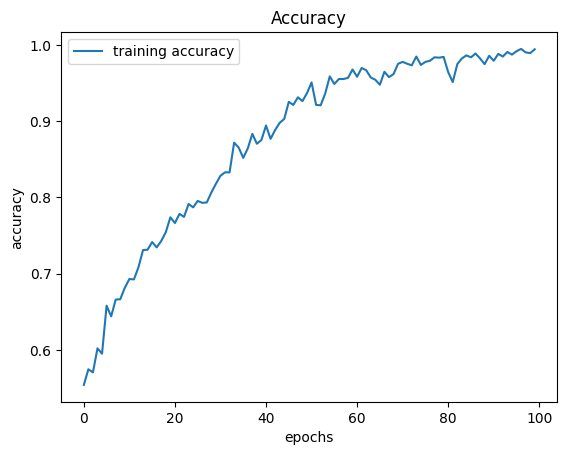

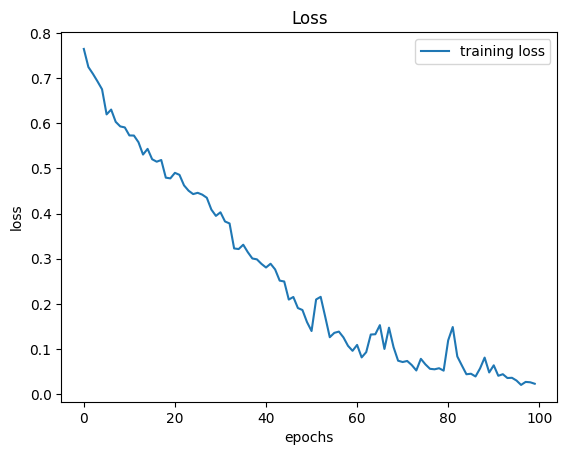

In [ ]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(model2.history.history['accuracy'], label='training accuracy')
#plt.plot(model2.history.history['loss'], label='training loss')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(model2.history.history['loss'], label='training loss')
#plt.plot(model.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import pickle
with open('/content/history.pkl', 'wb') as file:
    pickle.dump(model2.history.history, file)

In [ ]:
for i in range(0,5):
       loss, accuracy = model2.evaluate(val_flow)

       print("Validation Loss:", loss)
       print("Validation Accuracy:", accuracy)

1/1 [==============================] - 1s 757ms/step - loss: 1.4425e-04 - accuracy: 1.0000
Validation Loss: 0.00014425328117795289
Validation Accuracy: 1.0
1/1 [==============================] - 1s 543ms/step - loss: 1.4425e-04 - accuracy: 1.0000
Validation Loss: 0.00014425328117795289
Validation Accuracy: 1.0
1/1 [==============================] - 1s 731ms/step - loss: 1.4425e-04 - accuracy: 1.0000
Validation Loss: 0.00014425328117795289
Validation Accuracy: 1.0


Exception ignored in: <function _xla_gc_callback at 0x7e35607a3c70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1/1 [==============================] - 1s 742ms/step - loss: 1.4425e-04 - accuracy: 1.0000
Validation Loss: 0.00014425322297029197
Validation Accuracy: 1.0
1/1 [==============================] - 1s 699ms/step - loss: 1.4425e-04 - accuracy: 1.0000
Validation Loss: 0.00014425328117795289
Validation Accuracy: 1.0
